In [2]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
data = pd.read_csv('sensor_data_200.txt', delimiter=' ', header=None, names=['date', 'time', 'ir', 'lidar'])

data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [4]:
print(data['lidar'][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


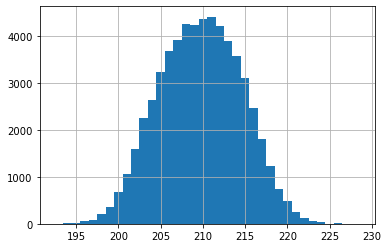

In [5]:
data['lidar'].hist(bins=max(data['lidar'])-min(data['lidar']), align='left')
plt.show()

In [6]:
#平均値
mean = data['lidar'].mean()
print(mean)

209.73713297619855


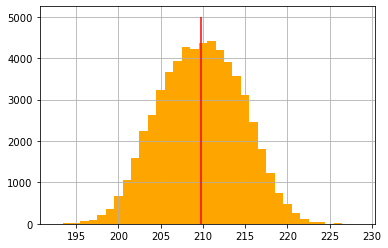

In [7]:
data['lidar'].hist(bins=max(data['lidar'])-min(data['lidar']), color='orange', align='left')
plt.vlines(mean, ymin=0, ymax=5000, color='red')
plt.show()

In [8]:
#標本分散
#普遍分散
default_var = np.var(data['lidar'])
unbiased_var = np.var(data['lidar'], ddof=1)
print(default_var)
print(unbiased_var)

23.407709770274106
23.40810659855441


In [9]:
#標準偏差
standard_deviation = np.std(data['lidar'])
print(standard_deviation)

4.838151482774605


In [10]:
freqs = pd.DataFrame(data['lidar'].value_counts())
freqs.columns = ['frequency']
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
frequency,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [11]:
freqs['probs'] = freqs['frequency'] / len(data['lidar'])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
frequency,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [12]:
sum(freqs['probs'])

1.0

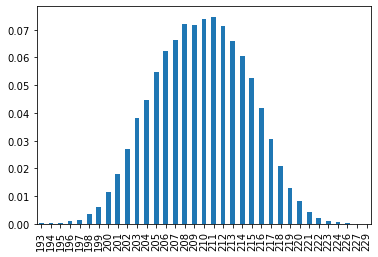

In [13]:
freqs['probs'].sort_index().plot.bar()
plt.show()

In [14]:
def drawing():
    return freqs.sample(n=1, weights='probs').index[0]

drawing()

208

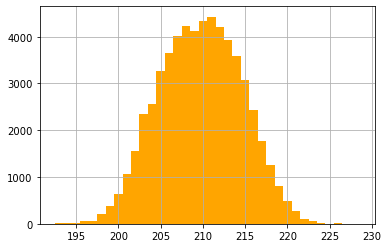

In [15]:
samples = [drawing() for i in range(len(data['lidar']))]
simulated = pd.DataFrame(samples, columns=['lidar'])
p = simulated['lidar']
p.hist(bins=max(p)-min(p), color='orange', align='left')
plt.show()

In [16]:
def p(z, mu=209.7, dev=23.4):
    return math.exp(-(z-mu)**2/(2*dev)) / math.sqrt(2*math.pi*dev)

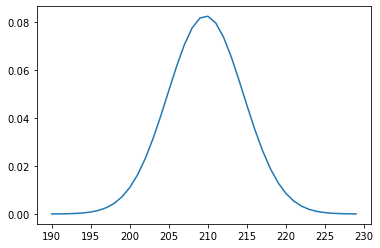

In [17]:
zs = range(190,230)
ys = [p(z) for z in zs]

plt.plot(zs, ys)
plt.show()

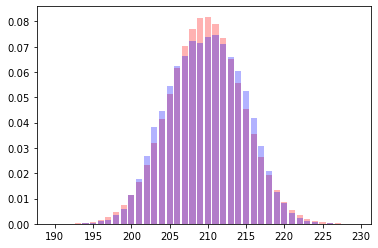

In [18]:
def prob(z, width=0.5):
    return width * (p(z-width) + p(z+width))

zs = range(190,230)
ys = [prob(z) for z in zs]

plt.bar(zs, ys, color='red', alpha=0.3)
f = freqs['probs'].sort_index()
plt.bar(f.index, f, color='blue', alpha=0.3)
plt.show()

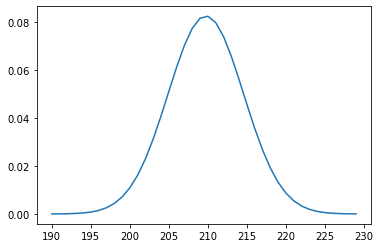

In [19]:
zs = range(190,230)
ys = [norm.pdf(z, mean , standard_deviation) for z in zs]

plt.plot(zs, ys)
plt.show()

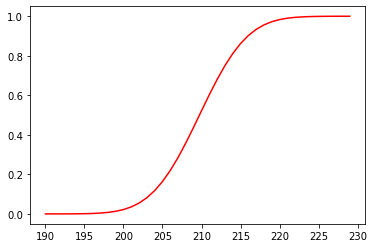

In [20]:
#累積分布関数
zs = range(190,230)
ys = [norm.cdf(z, mean , standard_deviation) for z in zs]

plt.plot(zs, ys, color='red')
plt.show()

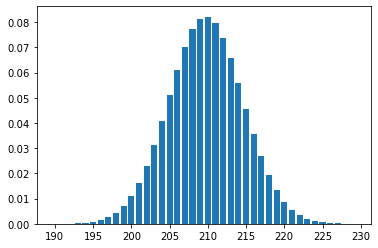

In [21]:
zs = range(190,230)
ys = [norm.cdf(z+0.5, mean , standard_deviation) - norm.cdf(z-0.5, mean , standard_deviation) for z in zs]

plt.bar(zs, ys)
plt.show()